<a href="https://colab.research.google.com/github/andremarinho17/data_analytics_projects_en/blob/main/Activity_Explore_probability_distributions_Andr%C3%A9_Marinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity: Exploring probability distributions for the EPA to improve the air quality

**Author:** André Marinho

<p align="center"><img src="https://weadapt.org/wp-content/uploads/2023/05/screenshot_2022-10-19_at_16.35.53.png" height="150px">


## **Introduction**

The ability to determine which type of probability distribution best fits data, calculate z-score, and detect outliers are essential skills in data work. These capabilities enable data professionals to understand how their data is distributed and identify data points that need further examination.

In this activity, you are a member of an analytics team for the United States Environmental Protection Agency (EPA). The data includes information about more than 200 sites, identified by state, county, city, and local site names. One of your main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, you will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

## **Step 1: Imports**

Import relevant libraries, packages, and modules. For this lab, you will need `numpy`, `pandas`, `matplotlib.pyplot`, `statsmodels.api`, and `scipy`.

In [ ]:
# Import relevant libraries, packages, and modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

A subset of data was taken from the air quality data collected by the EPA, then transformed to suit the purposes of this lab. This subset is a .csv file named `modified_c4_epa_air_quality.csv`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.

df = pd.read_csv("modified_c4_epa_air_quality.csv")
df.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to what you learned about loading data in Python.
    
  
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in the `pandas` library that allows you to load data from a .csv file into a DataFrame.
    
  
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

Use the `read_csv()` function and pass in the name of the csv file as a string.
    
</details>

## **Step 2: Data exploration**

Display the first 10 rows of the data to get a sense of how the data is structured.

In [ ]:
# Display first 10 rows of the data.

df.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to what you learned about exploring datasets in Python.
    
  
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in the `pandas` library that allows you to display a specific number of rows from the top of a DataFrame.
    
  
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

Use the `head()` function and pass in how many rows from the top of the DataFrame you want to display.
    
</details>

The `aqi_log` column represents AQI readings that were transformed logarithmically to suit the objectives of this lab. Taking a logarithm of the aqi to get a bell-shaped distribution is outside the scope of this course, but is helpful to see the normal distribution.

To better understand the quantity of data you are working with, display the number of rows and the number of columns.

In [ ]:
# Display number of rows, number of columns.

print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 260
Number of columns: 8


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to what you learned about exploring datasets in Python.
    
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

Every DataFrame in `pandas` has a property that gives you access to the number of rows and number of columns in that DataFrame.
  
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

Call the `shape` property of the DataFrame, which will display the number of rows and the number of columns as a tuple.
    
</details>

Now, you want to find out whether `aqi_log` fits a specific type of probability distribution. Create a histogram to visualize the distribution of `aqi_log`. Then, based on its shape, visually determine if it resembles a particular distribution.

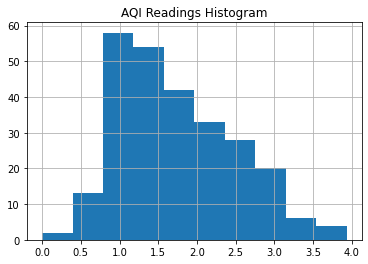

In [ ]:
# Create a histogram to visualize distribution of aqi_log.

df['aqi_log'].hist()
plt.title('AQI Readings Histogram')
plt.show()

<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about creating a histogram to visualize the distribution of a particular variable in the data.
    
  
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in the `matplotlib` library that can be called to create a histogram.
    
  
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

The `hist()` function can be called directly on the `aqi_log` column from the data.

A semicolon can be used at the end as a quick way to make sure only the plot gets displayed (other text does not get displayed).
    
</details>

**Question:** What do you observe about the shape of the distribution from the histogram?

We can observe that we probably have a right-skewed distribution here, not a normal distribution, as the tail is much longer to the right side and the AQI peaks are close to the left. In order to investigate this assumption, additional analysis will be made in the next steps.

## **Step 3: Statistical tests**

Use the empirical rule to observe the data, then test and verify that it is normally distributed.


 As you have learned, the empirical rule states that, for every normal distribution:
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean


First, define two variables to store the mean and standard deviation, respectively, for `aqi_log`. Creating these variables will help you easily access these measures as you continue with the calculations involved in applying the empirical rule.

In [ ]:
# Define variable for aqi_log mean.

mean_overall_aqi = df['aqi_log'].mean()

# Print out the mean.

mean_overall_aqi

1.7669210929985577

In [ ]:
# Define variable for aqi_log standard deviation.

std_overall_aqi = df['aqi_log'].std()

# Print out the standard deviation.

std_overall_aqi

0.7147155520223721

<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the lesson about calculating the mean and standard deviation for a particular variable in the data.
    
  
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

There are functions in the `numpy` library that can be called to calculate mean and standard deviation, respectively.
    
  
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

The `mean()` function can be called directly on the `aqi_log` column from the data to compute the mean.

The `std()` function can be called directly on the `aqi_log` column from the data to compute the standard deviation.
    
</details>

Now, check the first part of the empirical rule: whether 68% of the `aqi_log` data falls within 1 standard deviation of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 1 standard deviation below the mean) and the upper limit (for example, 1 standard deviation above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [ ]:
# Define variable for lower limit, 1 standard deviation below the mean.

lower_limit_1std = mean_overall_aqi - (1 * std_overall_aqi)

# Define variable for upper limit, 1 standard deviation above the mean.

upper_limit_1std = mean_overall_aqi + (1 * std_overall_aqi)

# Display lower_limit, upper_limit.

print('The lower limit for the AQI readings when it comes to 1 standard deviation below the mean is:', lower_limit_1std)
print('The upper limit for the AQI readings when it comes to 1 standard deviation above the mean is:', upper_limit_1std)

The lower limit for the AQI readings when it comes to 1 standard deviation below the mean is: 1.0522055409761855
The upper limit for the AQI readings when it comes to 1 standard deviation above the mean is: 2.48163664502093


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about using the empirical rule.
    
  
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

The lower limit here is $mean - 1 * std$.

The upper limit here is $mean + 1 * std$.

The `print` function can be called to display.
    
  
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

Use the variables that you defined for mean and standard deviation of `aqi_log`, ensuring the spelling is correct.

Call the `print` function and pass in the values one after the other, with a comma between them.
    
</details>

In [ ]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.
one_std = ((df['aqi_log'] >= lower_limit_1std) & (df['aqi_log'] <= upper_limit_1std)).mean() * 100
print('{}% is the percentage of data that falls within 1 standard deviation of the mean.'.format(round(one_std,1)))

76.2% is the percentage of data that falls within 1 standard deviation of the mean.


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about using the empirical rule.
    
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

The `>=` operator can be used to confirm whether one value is greater than or equal to another value.

The `<=` operator can be used to check whether one value is less than or equal to another value.

The `&` operator can be used to check if one condition and another condition is met.
    
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

The `mean()` function can be used to compute the proportion of the data that satisfies the specified conditions.

Multiplying that proportion by $100$ can get you the percentage.
    
</details>

Now, consider the second part of the empirical rule: whether 95% of the `aqi_log` data falls within 2 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 2 standard deviations below the mean) and the upper limit (for example, 2 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [ ]:
# Define variable for lower limit, 2 standard deviations below the mean.

lower_limit_2std = mean_overall_aqi - (2 * std_overall_aqi)

# Define variable for upper limit, 2 standard deviations below the mean.

upper_limit_2std = mean_overall_aqi + (2 * std_overall_aqi)

# Display lower_limit, upper_limit.

print('The lower limit for the AQI readings when it comes to 2 standard deviations below the mean is:', lower_limit_2std)
print('The upper limit for the AQI readings when it comes to 2 standard deviations above the mean is:', upper_limit_2std)

The lower limit for the AQI readings when it comes to 2 standard deviations below the mean is: 0.33748998895381344
The upper limit for the AQI readings when it comes to 2 standard deviations above the mean is: 3.1963521970433018


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about using the empirical rule.
    
  
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

The lower limit here is $mean - 2 * std$.

The upper limit here is $mean + 2 * std$.

The `print` function can be called to display.
    
  
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

Use the variables that you defined for mean and standard deviation of `aqi_log`, ensuring the spelling is correct.

Call the `print` function and pass in the values one after the other, with a comma between them.
    
</details>

In [ ]:
# Display the actual percentage of data that falls within 2 standard deviations of the mean.

two_std = ((df['aqi_log'] >= lower_limit_2std) & (df['aqi_log'] <= upper_limit_2std)).mean() * 100
print('{}% is the percentage of data that falls within 2 standard deviations of the mean.'.format(round(two_std,1)))

95.8% is the percentage of data that falls within 2 standard deviations of the mean.


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video section about using the empirical rule.
    
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

The `>=` operator can be used to confirm whether one value is greater than or equal to another value.

The `<=` operator can be used to check whether one value is less than or equal to another value.

The `&` operator can be used to check if one condition and another condition is met.
    
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

The `mean()` function can be used to compute the proportion of the data that satisfies the specified conditions.

Multiplying that proportion by $100$ can get you the percentage.
    
</details>

Now, consider the third part of the empirical rule:whether 99.7% of the `aqi_log` data falls within 3 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 3 standard deviations below the mean) and the upper limit (for example, 3 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [ ]:
# Define variable for lower limit, 3 standard deviations below the mean.

lower_limit_3std = mean_overall_aqi - (3 * std_overall_aqi)

# Define variable for upper limit, 3 standard deviations above the mean.

upper_limit_3std = mean_overall_aqi + (3 * std_overall_aqi)

# Display lower_limit, upper_limit.

print('The lower limit for the AQI readings when it comes to 3 standard deviations below the mean is:', lower_limit_3std)
print('The upper limit for the AQI readings when it comes to 3 standard deviations above the mean is:', upper_limit_3std)

The lower limit for the AQI readings when it comes to 3 standard deviations below the mean is: -0.3772255630685586
The upper limit for the AQI readings when it comes to 3 standard deviations above the mean is: 3.911067749065674


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about using the empirical rule.
    
  
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

The lower limit here is $mean - 3 * std$.

The upper limit here is $mean + 3 * std$.

The `print` function can be called to display.
    
  
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

Use the variables that you defined for mean and standard deviation of `aqi_log`, ensuring the spelling is correct.

Call the `print` function and pass in the values one after the other, with a comma between them.
    
</details>

In [ ]:
# Display the actual percentage of data that falls within 3 standard deviations of the mean.

three_std = ((df['aqi_log'] >= lower_limit_3std) & (df['aqi_log'] <= upper_limit_3std)).mean() * 100
print('{}% is the percentage of data that falls within 3 standard deviations of the mean.'.format(round(three_std,1)))

99.6% is the percentage of data that falls within 3 standard deviations of the mean.


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about using the empirical rule.
    
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

The `>=` operator can be used to confirm whether one value is greater than or equal to another value.

The `<=` operator can be used to check whether one value is less than or equal to another value.

The `&` operator can be used to check if one condition and another condition is met.
    
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

The `mean()` function can be used to compute the proportion of the data that satisfies the specified conditions.

Multiplying that proportion by $100$ can get you the percentage.
    
</details>

## **Step 4: Results and evaluation**

**Question:** What results did you attain by applying the empirical rule?

The results obtained by applying the empirical rule were:
* 76.2% of the AQI readings fall within +/- 1 standard deviation from the mean.
* 95.8% of the AQI readings fall within +/- 2 standard deviations from the mean.
* 99.6% of the AQI readings fall within +/- 3 standard deviations from the mean.

Although the last two percentages do satisfy the empirical rule criteria, the first doesn't, as 76% is above 68%, which is the first criterion. With that said, the AQI readings column doesn't follow an exact normal distribution but is considerably normal.

**Question:** How would you use z-score to find outliers?

The use of z-score can help to identify outliers by standardizing the dataset and determining how far each data point is from the mean in terms of standard deviations. To determine the outliers, it is necessary to identify how many AQI readings are above or below 3 standard deviations from the mean.

Compute the z-score for every `aqi_log` value. Then, add a column named `z_score` in the data to store those results.

In [ ]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.

df['aqi_z_score'] = stats.zscore(df['aqi_log'])

# Display the first 5 rows to ensure that the new column was added.

df.head(5)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,aqi_z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.438109
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034820
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.936873
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.533584
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.533584


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about calculating z-score.
    
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in the `stats` module of the `scipy` library that you can call to calculate z-score.
    
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

Call the `zscore()` function and pass in the `aqi` column from the data.
    
</details>

Identify the parts of the data where `aqi_log` is above or below 3 standard deviations of the mean.

In [ ]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean

df[(df['aqi_z_score'] <= -3) | (df['aqi_z_score'] >= 3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,aqi_z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.034886


<details><summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the video about outlier detection.
    
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

The `>` operator can be used to evaluate whether one value is greater than another value.

The `<` operator can be used to evaluate whether one value is less than another value.

The `|` operator can used to evaluate whether one condition or another condition is met.  
    
</details>

<details><summary><h4><strong>Hint 3</strong></h4></summary>

To index the DataFrame, place a pair of parantheses around the evaluation of the two conditions and pass that into a pair of square brackets. This will allow you to get all rows in the data where the specified criteria is met.

Make sure the spelling of the column matches the name you specified when creating that column.
    
</details>

**Question:** What do you observe about potential outliers based on the calculations?


It's possible to observe that Maricopa, a county from Phoenix (Arizona), has the worst air quality of all sites, as the AQI is a little above 3 standard deviations of the mean.

**Question:** Why is outlier detection an important part of this project?

The detection of this outlier can help the government to direct funds and shape new policies in order to improve the air quality in West Phoenix (Arizona).

## **Considerations**

**What are some key takeaways that you learned during this lab?**

Identifying the distribution and analyzing which type of distribution fits the data it's important in order to conduct additional analysis, including Machine Learning considering that the distribution is normal. In addition, the use of z-score helps a lot to standardize the data and identify outliers.

**What summary would you provide to stakeholders? Consider the distribution of the data and which sites would benefit from additional research.**

The following observations stood out:
* We don't have an exact normal distribution for the AQI readings, but a considerably normal distribution, with most values falling above the mean, which means that most of the sites don't have good air quality.
* West Phoenix has the most unfavorable AQI index. With that said, further investigations must be conducted and new policies are urgent in order to improve the air quality in that region.

**Reference**

US EPA, OAR. 2014, July 8. [Air Data: Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data).

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.